In [58]:
# Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Load the regular expression library
import re
# Import the wordcloud library
from PIL import Image
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
import warnings

In [59]:
#initial dataset analysis
papersDF= pd.read_csv('papers.csv', engine='python')

In [60]:
papersDF.head()

,ï»¿id,year,title,event_type,pdf_name,abstract,paper_text,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# Read datasets/papers.csv into papersDF
field =['id','year','title','event_type','pdf_name','abstract','paper_text']
papersDF= pd.read_csv('papers.csv', engine ='python', header = None, usecols=np.arange(7), names= field)


In [62]:
# Print out the first rows of papers
papersDF.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,ï»¿id,year,title,event_type,pdf_name,abstract,paper_text
1,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
2,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
3,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
4,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...


In [63]:
papersDF.shape

(178078, 7)

In [64]:
papersDF.columns

Index(['id', 'year', 'title', 'event_type', 'pdf_name', 'abstract',
       'paper_text'],
      dtype='object')

In [65]:
papersDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178078 entries, 0 to 178077
Data columns (total 7 columns):
id            160245 non-null object
year          86704 non-null object
title         57588 non-null object
event_type    24215 non-null object
pdf_name      18949 non-null object
abstract      13510 non-null object
paper_text    10357 non-null object
dtypes: object(7)
memory usage: 9.5+ MB


In [66]:
newPaperDF = papersDF[papersDF['id'].str[0].str.isdigit() == True]

In [67]:
newDF =newPaperDF[newPaperDF['year'].str[0:4].str.isdigit() == True]
newDF.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
1,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
2,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
3,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
4,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
5,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [68]:
# Remove the columns
reducedDF =newDF[['year','paper_text']]
reducedDF = reducedDF.dropna(axis=0, subset=['paper_text'])
reducedDF.head()

,year,paper_text
1,1987,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
2,1987,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
3,1988,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
4,1994,Bayesian Query Construction for Neural\nNetwor...
5,1994,"Neural Network Ensembles, Cross\nValidation, a..."


In [69]:
# Group the papers by year
#reducedDF = reducedDF['year'].astype(str).astype(int)
groupedDF = reducedDF.groupby('year').agg('count')
groupedDF.head()

,paper_text
year,
1987,90
1988,94
1989,101
1990,143
1991,144


In [70]:
# Determine the size of each group
reducedDF.size

14482

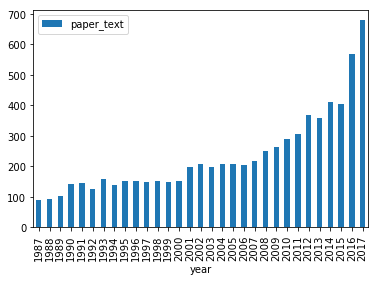

In [71]:
# Visualise the counts as a bar plot
%matplotlib inline
groupedDF.plot(kind ='bar')


In [72]:
# From the regular expression library
# Print the titles of the first rows 
print(newDF['title'].head())

1    Self-Organization of Associative Database and ...
2    A Mean Field Theory of Layer IV of Visual Cort...
3    Storing Covariance by the Associative Long-Ter...
4    Bayesian Query Construction for Neural Network...
5    Neural Network Ensembles, Cross Validation, an...
Name: title, dtype: object


In [73]:
# Remove punctuation
newDF['title_processed'] = newDF['title'].map(lambda x: re.sub('[,\.!?]', '', str(x)))
newDF.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,year,title,event_type,pdf_name,abstract,paper_text,title_processed
1,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...,Self-Organization of Associative Database and ...
2,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...,A Mean Field Theory of Layer IV of Visual Cort...
3,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...,Storing Covariance by the Associative Long-Ter...
4,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...,Bayesian Query Construction for Neural Network...
5,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a...",Neural Network Ensembles Cross Validation and ...


In [90]:
# Convert the titles to lowercase
newDF['title_processed']= newDF['title'].str.lower()
newDF.dropna(subset=['title_processed'])
newDF.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,year,title,event_type,pdf_name,abstract,paper_text,title_processed
1,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...,self-organization of associative database and ...
2,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...,a mean field theory of layer iv of visual cort...
3,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...,storing covariance by the associative long-ter...
4,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...,bayesian query construction for neural network...
5,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a...","neural network ensembles, cross validation, an..."


In [88]:
# Join the different processed titles together.
text = str(' '.join (newDF['title_processed'].map(lambda x: ''.join(str((x))))))

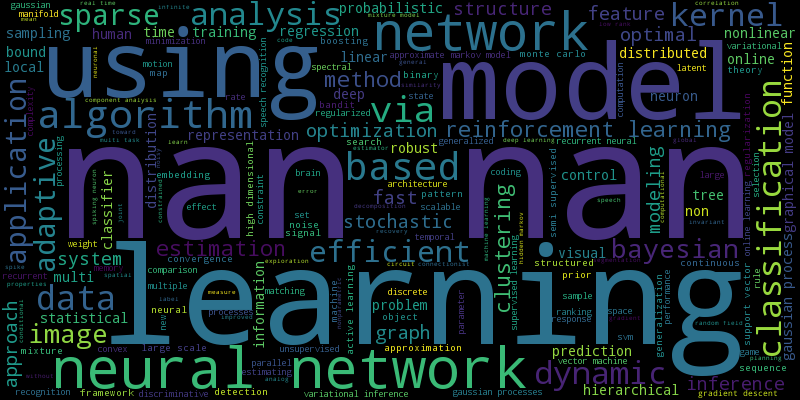

In [89]:
# Create a WordCloud object
wc = WordCloud(width=800, height=400)
# Generate a word cloud
wc.generate(str(text))
# Visualize the word cloud
wc.to_image()

### The main text analysis method that is used is latent Dirichlet allocation (LDA). LDA is able to perform topic detection on large document sets, determining what the main 'topics' are in a large unlabeled set of texts.

In [91]:
# Helper function
def plot10CommonWords(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:11]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

In [92]:
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

In [93]:
Listtext =newDF['title_processed'].map(lambda x: ''.join(str(x)))

In [94]:
# Fit and transform the processed titles
count_data =count_vectorizer.fit_transform(Listtext)

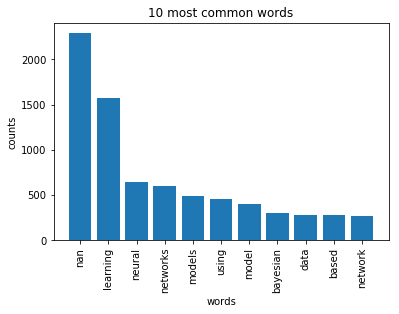

In [95]:
# Visualise the 10 most common words
plot10CommonWords(count_data,count_vectorizer)

### Now we can match the most occuring word in LDA analysis with word cloud and see that neural networks and baysein are some of the hot topics in Machine Learning 